In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Solving the problem again but with no small angle approximation**



Kinetic Energy: $$T=\frac{1}{2}MR^2\dot{\phi}^2$$

Potential Energy: $$U=\frac{1}{2}kr^2\sin^2{\phi}$$

Lagrange: $$L = T-U = \frac{1}{2}MR^2\dot{\phi}^2-\frac{1}{2}kr^2\sin^2{\phi}$$

Solving: $$\frac{\partial L}{\partial\phi}=\frac{d}{dt}\frac{\partial L}{\partial\dot{\phi}}$$

$$-\frac{1}{2}kr^2\sin{(2\phi)}=MR^2\ddot{\phi}$$

$$\boxed{\ddot{\phi}=-\frac{kr^2\sin{(2\phi)}}{2MR^2}}$$

**Setting up Variables and Initial Conditions** 

In [2]:
# Variables
k = 100 # N/m
M = 1 # kg
r = 0.25 # m
R = 0.75 # m

# ICs
phi_0 = 0.3*np.pi # radians
dphi_0 = 0.5 # radians/s

**Numerically solving with the Forward Euler's Method**

In [3]:
n = 1000  # number of values in interval. Make n large
t_max = 30 # maximum value of interval. Tweak to stop function from blowing up

t = np.zeros(n + 1)
phi = np.zeros(n + 1)
phidot = np.zeros(n + 1)
phiddot = np.zeros(n + 1)

t[0] = 0
phi[0] = phi_0
phidot[0] = dphi_0

h = t_max / n
for i in range(n):
    t[i + 1] = t[i] + h
    phi[i + 1] = phi[i] + h * phidot[i]
    phidot[i + 1] = phidot[i] + h * phiddot[i]
    phiddot[i + 1] = -(k*r**2*np.sin(2*phi[i+1]))/(2*M*R**2)

phi = phi/np.pi

**Plotting Result**

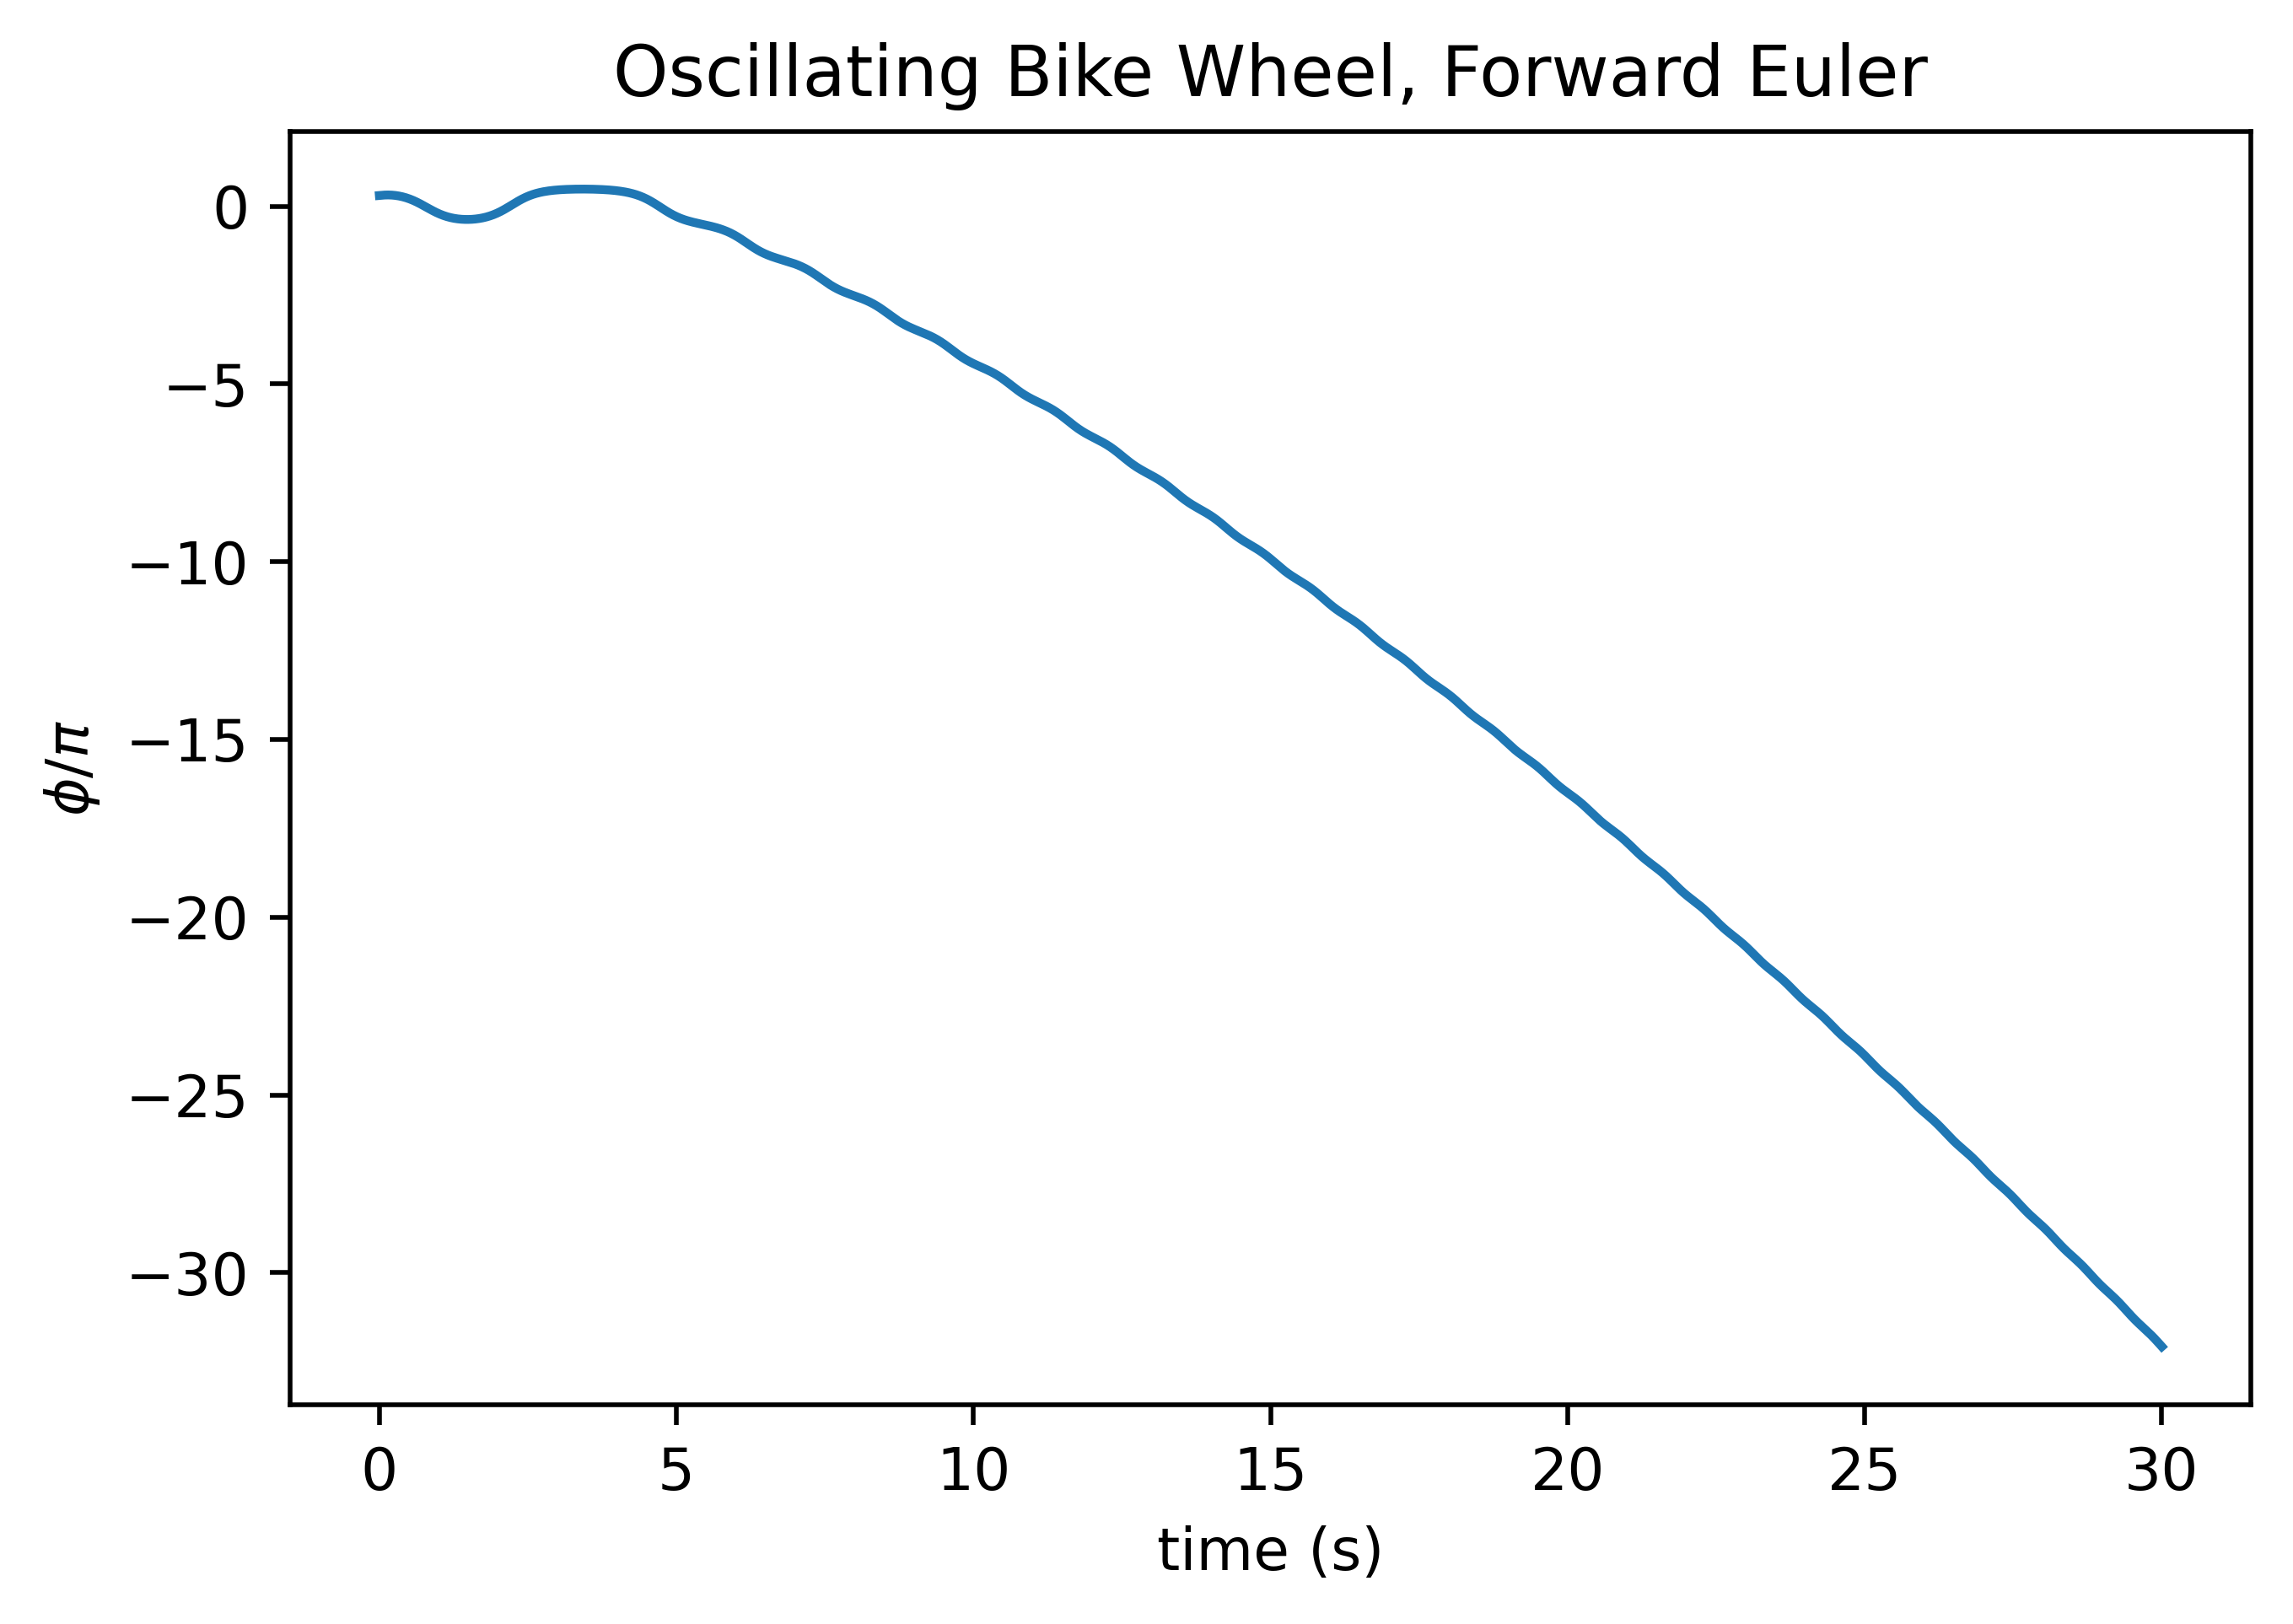

In [4]:
fig = plt.figure(dpi=500)
plt.plot(t, phi)
fig.set_facecolor("white")
plt.xlabel("time (s)")
plt.ylabel(r"$\phi/\pi$")
plt.title("Oscillating Bike Wheel, Forward Euler")
plt.show()

We can see that this is indeed the expected result. Some checks were done to make sure it behaves as it should:

- If we set k = 0 then the wheel should linearly increase in angle. This works!
- If we set k = 0 and dphi_0 = 0 then we should see the wheels does not move. This works!

Feel free to change the values around as needed and the results should hold.

**Runge-Kutta 4th order method**

Lets try to use the Runge-Kutta 4th order method to get better convergence for our function. 

First we need to turn our second order diff eq into two first order diff eqs:

$$x(t) = \phi(t)$$
$$v(t) = \dot{\phi}(t)$$

$$\dot{x} = \dot{\phi} = v$$
$$\dot{v} = \ddot{\phi} = -\frac{kr^2\sin{(2\phi)}}{2MR^2}$$

$$\boxed{\dot{x} = v}$$
$$\boxed{\dot{v} = -\frac{kr^2\sin{(2x)}}{2MR^2}}$$

In [5]:
def f(t,x,v):
    return -(k*r**2*np.sin(2*x))/(2*M*R**2)

n = 1000  # number of values in interval. Make n smaller
t_max = 30 # maximum value of interval. Tweak to stop function from blowing up

t = np.zeros(n + 1)
x = np.zeros(n + 1)
v = np.zeros(n + 1)

t[0] = 0
x[0] = phi_0
v[0] = dphi_0

h = t_max / n
for i in range(n):
    x1 = h*v[i]
    v1 = h*f(t[i], x[i], v[i])
    x2 = h*(v[i]+v1/2)
    v2 = h*f(t[i]+h/2, x[i]+x1/2, v[i]+v1/2)
    x3 = h*(v[i]+v2/2)
    v3 = h*f(t[i]+h/2, x[i]+x2/2, v[i]+v1/2)
    x4 = h*(v[i]+v3)
    v4 = h*f(t[i]+h, x[i]+x3, v[i]+v1)
    dx = (x1 + 2*x2 + 2*x3 + x4)/6
    dv = (v1 + 2*v2 + 2*v3 + v4)/6
    x[i+1] = x[i] + dx
    v[i+1] = v[i] + dv
    t[i+1] = t[i] + h

x = x/np.pi

**Plotting Result**

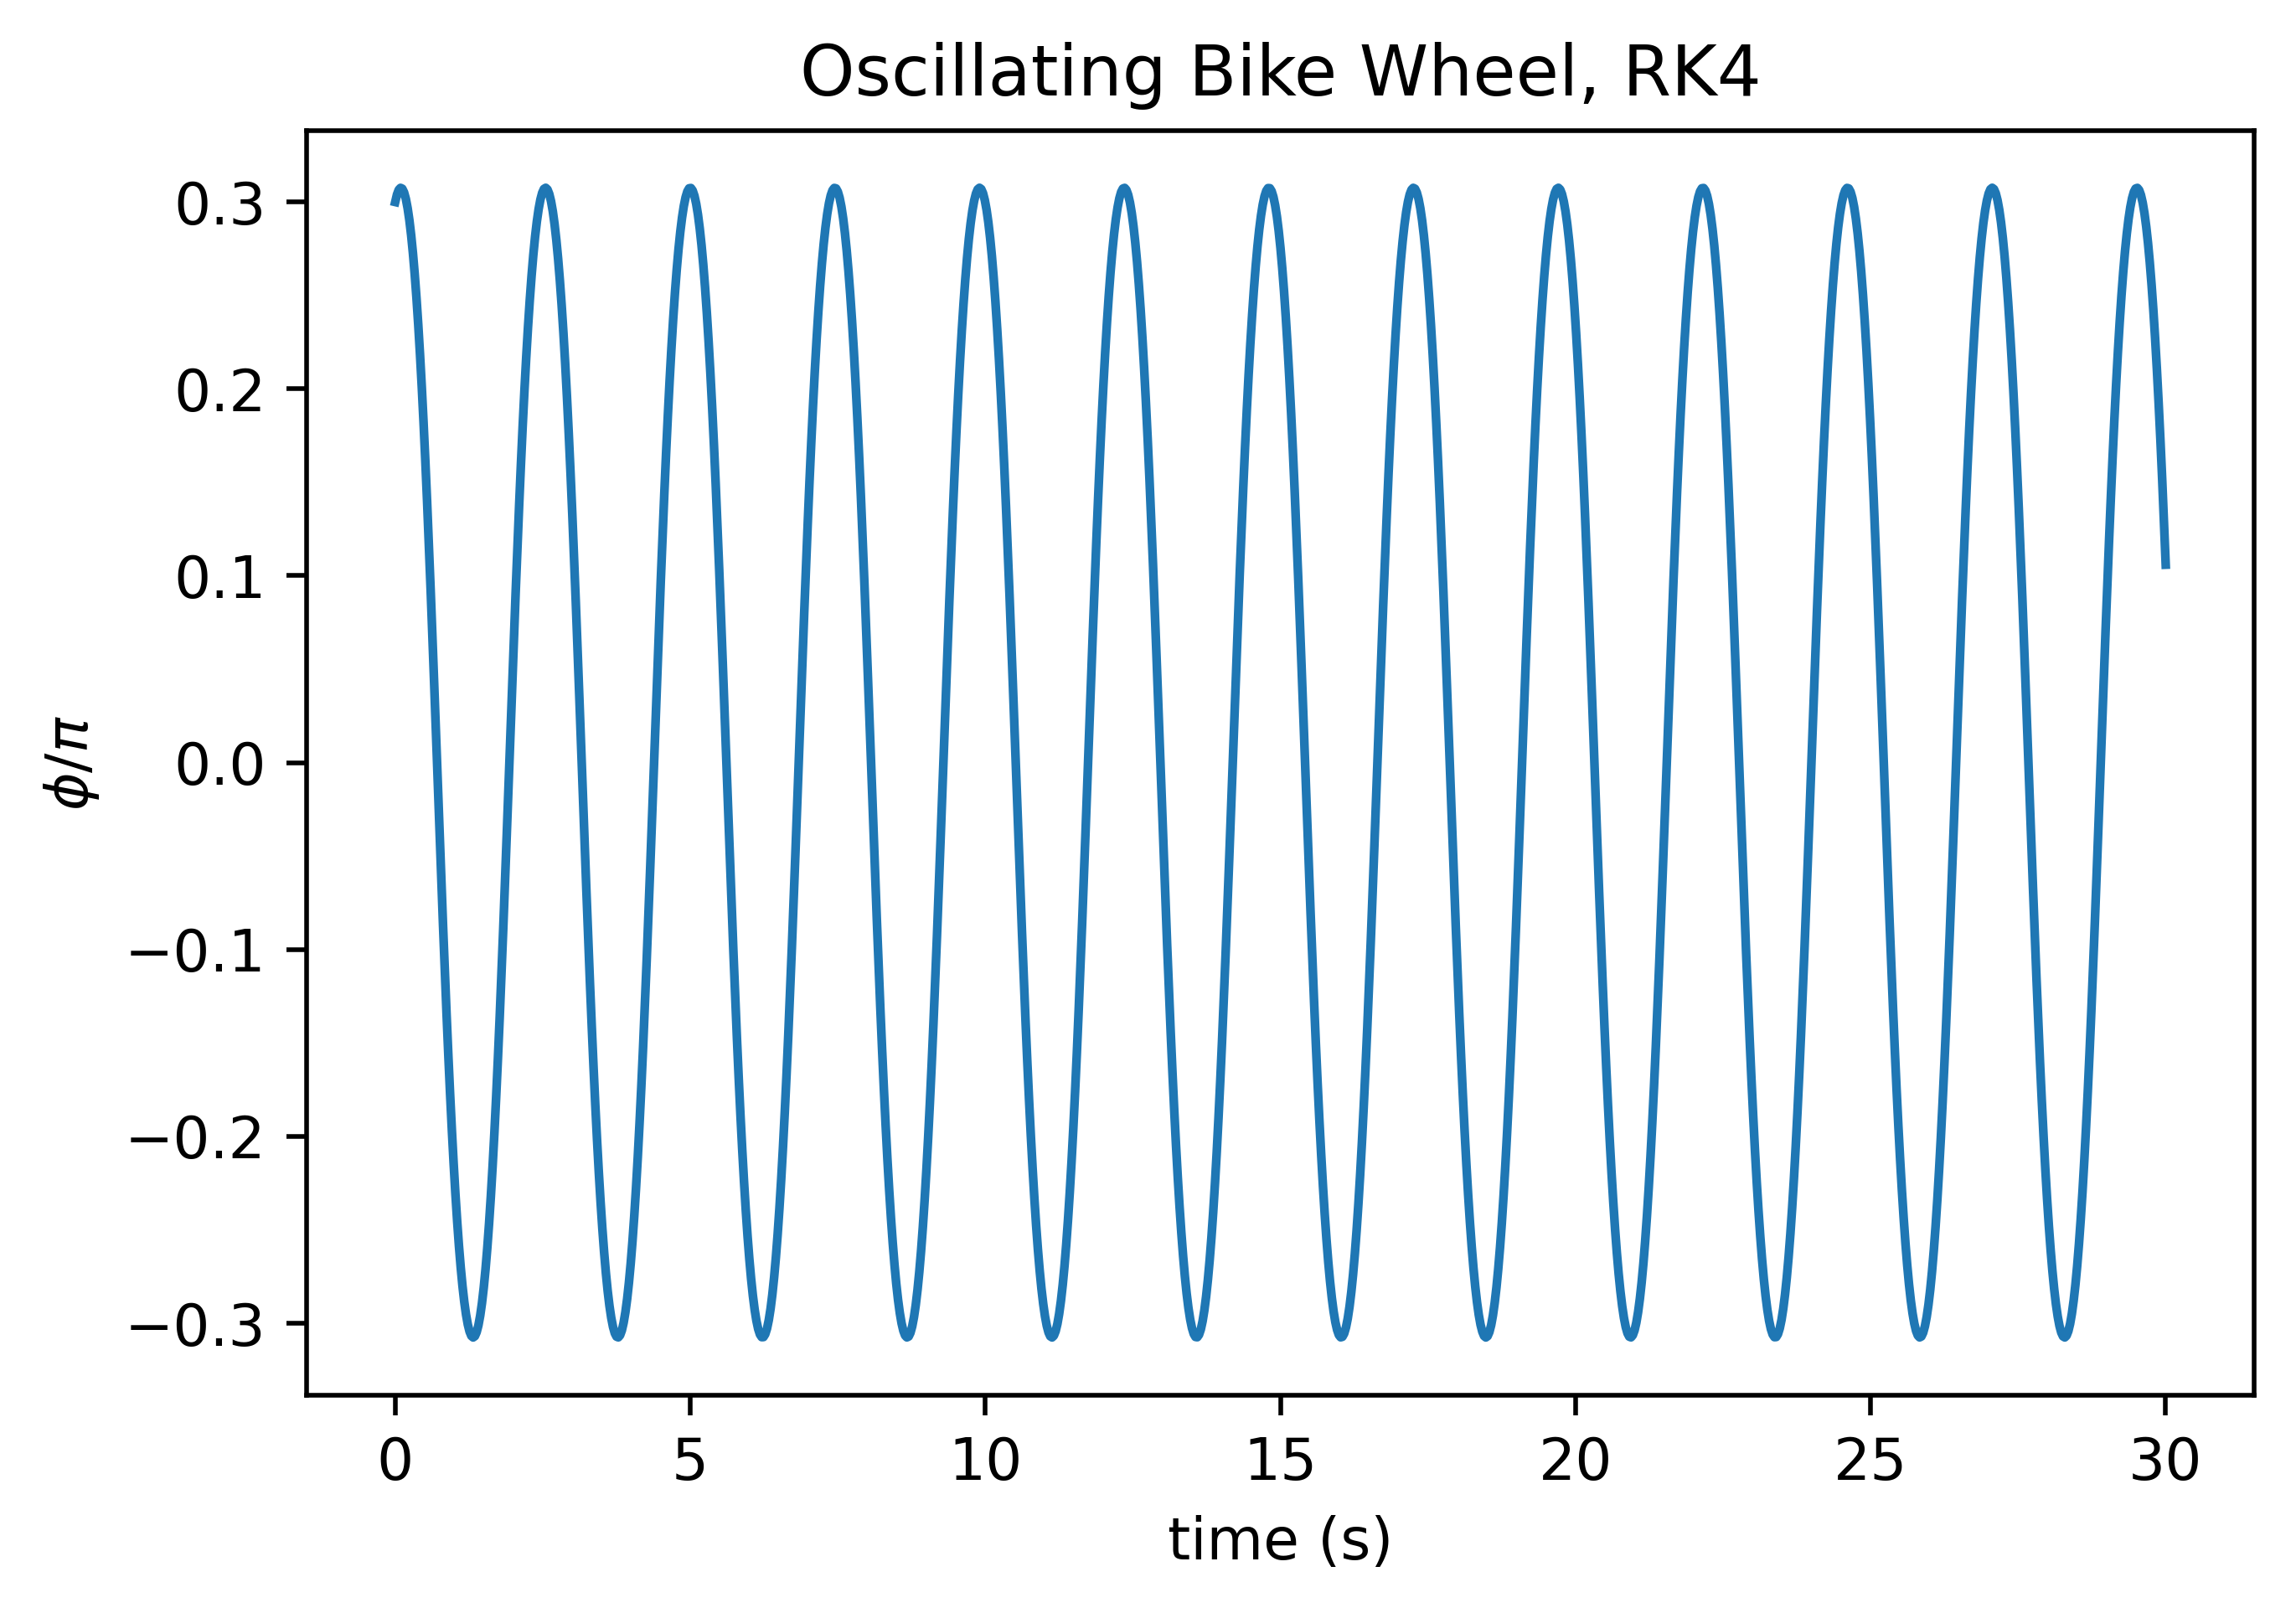

In [6]:
fig2 = plt.figure(dpi=500)
plt.plot(t, x)
fig2.set_facecolor("white")
plt.xlabel("time (s)")
plt.ylabel(r"$\phi/\pi$")
plt.title("Oscillating Bike Wheel, RK4")
plt.show()

As we can see, this method converges much better. After preforming the same checks as with Euler we still see the expected results hold!